In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install lifelines
from lifelines.datasets import load_lung
from lifelines.plotting import plot_lifetimes

# Load the lung cancer dataset
data = load_lung()

# Displaying the first few rows of the dataset
print("Lung Cancer Dataset:")
print(data.head())

Lung Cancer Dataset:
   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 17.9 KB
None


In [12]:
from lifelines.plotting import plot_lifetimes
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Checking for censoring in the dataset
censored_count = data['status'].value_counts()[0]
total_count = data.shape[0]
censoring_percentage = (censored_count / total_count) * 100
print(f"\nCensoring Percentage: {censoring_percentage:.2f}%")


Summary Statistics:
             inst         time      status         age         sex  \
count  227.000000   228.000000  228.000000  228.000000  228.000000   
mean    11.088106   305.232456    0.723684   62.447368    1.394737   
std      8.303491   210.645543    0.448159    9.073457    0.489870   
min      1.000000     5.000000    0.000000   39.000000    1.000000   
25%      3.000000   166.750000    0.000000   56.000000    1.000000   
50%     11.000000   255.500000    1.000000   63.000000    1.000000   
75%     16.000000   396.500000    1.000000   69.000000    2.000000   
max     33.000000  1022.000000    1.000000   82.000000    2.000000   

          ph.ecog    ph.karno   pat.karno     meal.cal     wt.loss  
count  227.000000  227.000000  225.000000   181.000000  214.000000  
mean     0.951542   81.938326   79.955556   928.779006    9.831776  
std      0.717872   12.327955   14.623177   402.174707   13.139902  
min      0.000000   50.000000   30.000000    96.000000  -24.000000  
25%

Lung Cancer Dataset:
   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  


/usr/local/lib/python3.10/dist-packages/lifelines/plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(


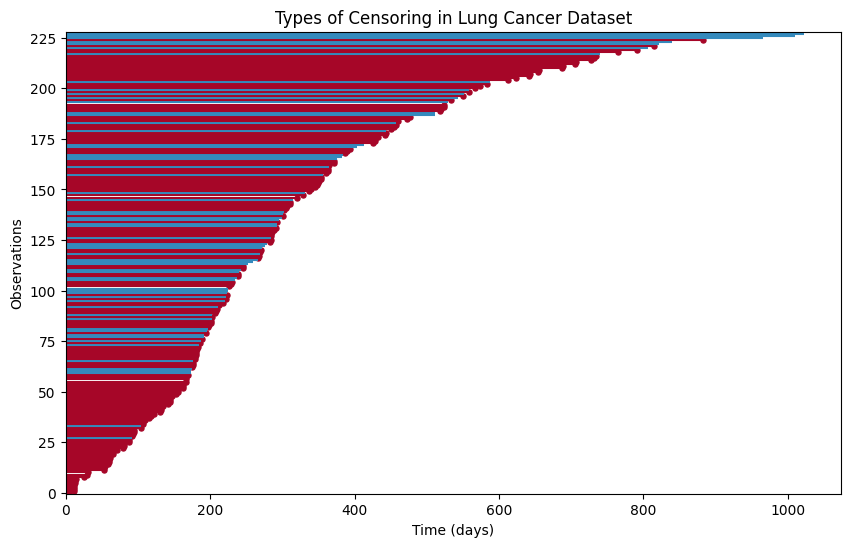

In [9]:
# Displaying the first few rows of the dataset
print("Lung Cancer Dataset:")
print(data.head())

# Extracting survival times and censoring indicators
survival_times = data['time']
censoring = data['status']

# Plotting the types of censoring
plt.figure(figsize=(10, 6))
plot_lifetimes(durations=survival_times, event_observed=(censoring == 1))
plt.title('Types of Censoring in Lung Cancer Dataset')
plt.xlabel('Time (days)')
plt.ylabel('Observations')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Sample data for demonstration
np.random.seed(123)
data = pd.DataFrame({
    'time': np.random.randint(0, 100, 100),
    'event': np.random.choice([1, 0], 100)
})

# Creating Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the data to Kaplan-Meier estimator
kmf.fit(data['time'], event_observed=data['event'])

# Plotting survival probability curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Survival Probability Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# Plotting hazard function curve
plt.figure(figsize=(10, 6))
kmf.plot_hazard()
plt.title('Hazard Function Curve')
plt.xlabel('Time')
plt.ylabel('Hazard Rate')
plt.grid(True)
plt.show()


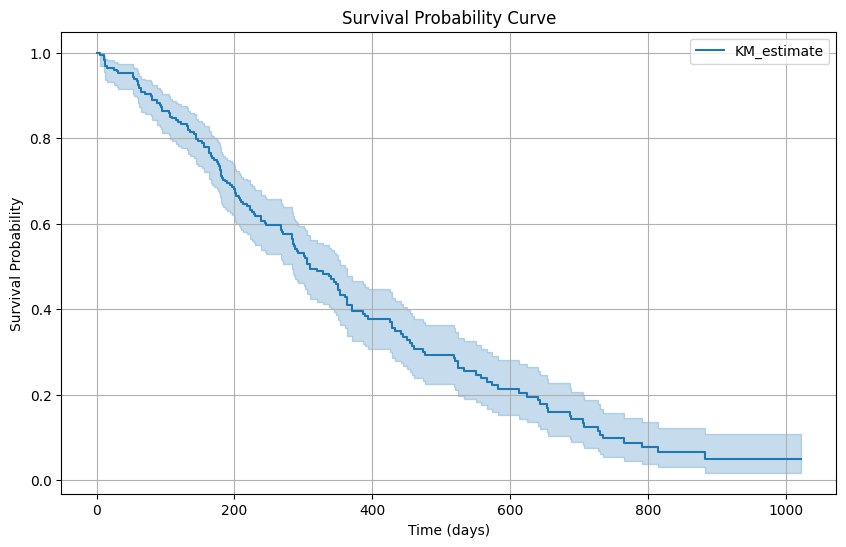

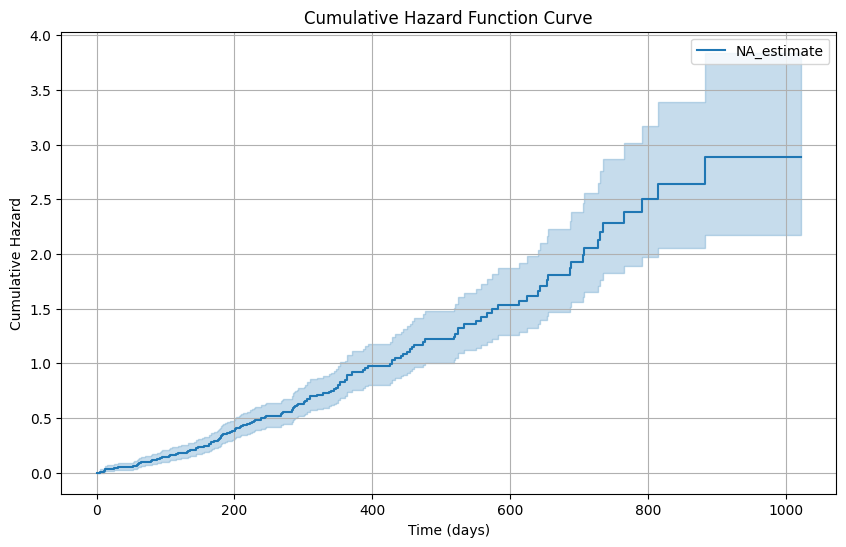

In [8]:
from lifelines import KaplanMeierFitter,NelsonAalenFitter
# Creating Kaplan-Meier estimator
kmf = KaplanMeierFitter()
# Creating Nelson-Aalen estimator
naf = NelsonAalenFitter()

# Fit the data to Kaplan-Meier estimator
kmf.fit(data['time'], event_observed=data['status'])
# Fit the data to Nelson-Aalen estimator
naf.fit(data['time'], event_observed=data['status'])

# Plotting survival probability curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Survival Probability Curve')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# Plotting hazard function curve
plt.figure(figsize=(10, 6))
naf.plot_cumulative_hazard()
plt.title('Cumulative Hazard Function Curve')
plt.xlabel('Time (days)')
plt.ylabel('Cumulative Hazard')
plt.grid(True)
plt.show()

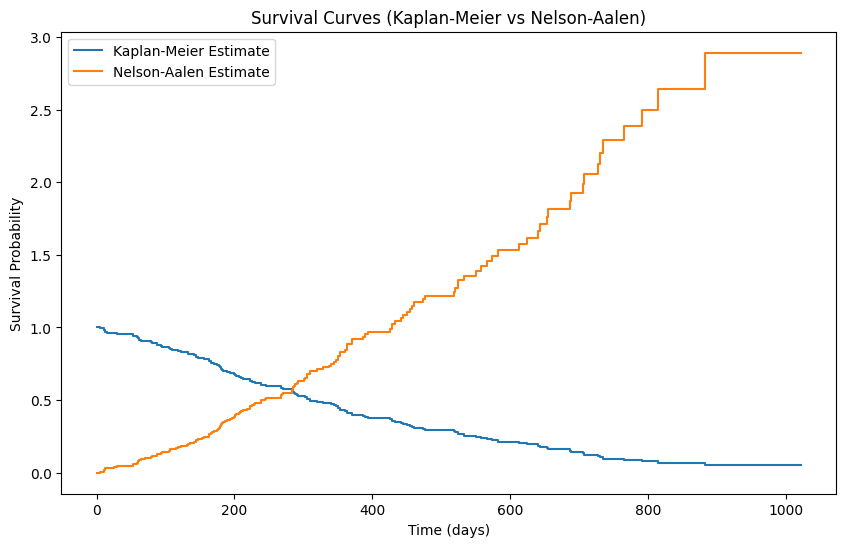

In [10]:
from lifelines.utils import datetimes_to_durations

# Fitting Kaplan-Meier estimator
kmf.fit(data['time'], event_observed=data['status'], label='Kaplan-Meier Estimate')

# Fitting Nelson-Aalen estimator
naf.fit(data['time'], event_observed=data['status'], label='Nelson-Aalen Estimate')

# Plotting Kaplan-Meier and Nelson-Aalen survival curves
plt.figure(figsize=(10, 6))
kmf.plot(ci_show=False)
naf.plot(ci_show=False)
plt.title('Survival Curves (Kaplan-Meier vs Nelson-Aalen)')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


In [13]:

# Load the lung cancer dataset
data = load_lung()

# Display the first few rows of the dataset
print("Lung Cancer Dataset:")
print(data.head())

# For simplicity, you can rename the columns to match the random survival dataset
data.rename(columns={'time': 'Survival_Time', 'status': 'Censoring'}, inplace=True)

# Display the first few rows of the renamed dataset
print("\nRenamed Lung Cancer Dataset:")
print(data.head())

Lung Cancer Dataset:
   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       1   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       1   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       0   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       1   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       1   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  

Renamed Lung Cancer Dataset:
   inst  Survival_Time  Censoring  age  sex  ph.ecog  ph.karno  pat.karno  \
0   3.0            306          1   74    1      1.0      90.0      100.0   
1   3.0            455          1   68    1      0.0      90.0       90.0   
2   3.0           1010          0   56    1      0.0      90.0       90.0   
3   5.0            210          1   57    1      1.0      90.0       60.0   
4   1.0            883          1  

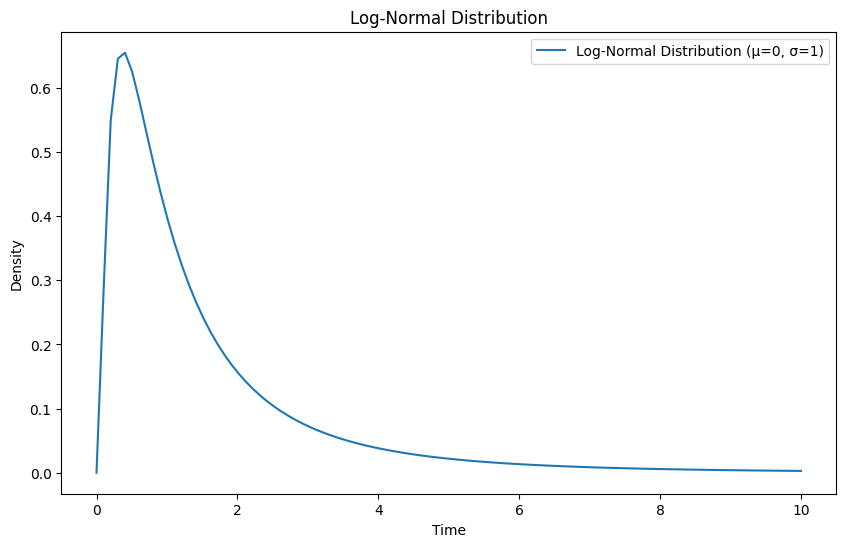

Parametric Regression Model (Cox Proportional Hazards Model):
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
inst      -0.030368   0.970089  0.013119       -0.056080       -0.004655   
age        0.012810   1.012892  0.011943       -0.010597        0.036217   
sex       -0.566628   0.567436  0.201352       -0.961270       -0.171986   
ph.ecog    0.907373   2.477804  0.238602        0.439721        1.375024   
ph.karno   0.026584   1.026941  0.011627        0.003795        0.049373   
pat.karno -0.010911   0.989149  0.008141       -0.026867        0.005045   
meal.cal   0.000003   1.000003  0.000268       -0.000522        0.000527   
wt.loss   -0.016711   0.983428  0.007911       -0.032216       -0.001206   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
inst                  0.945464 

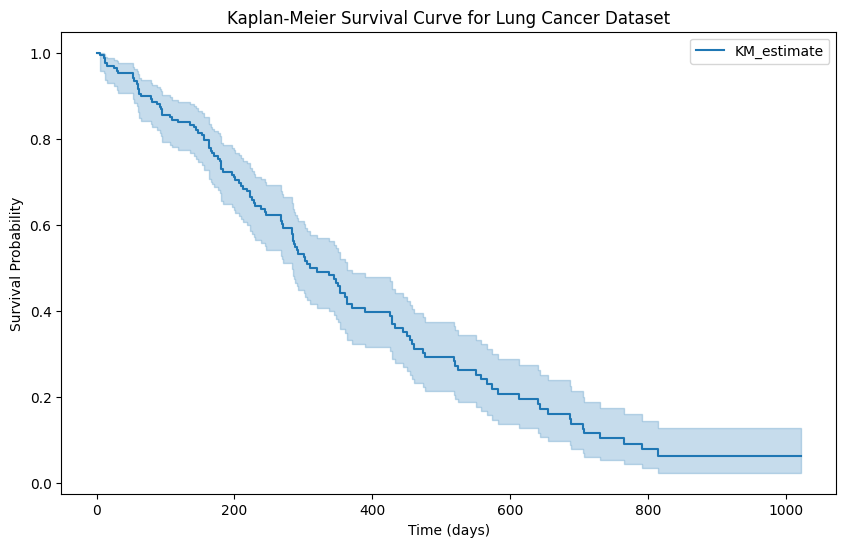

Cox Proportional Hazards Model:
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
inst      -0.030368   0.970089  0.013119       -0.056080       -0.004655   
age        0.012810   1.012892  0.011943       -0.010597        0.036217   
sex       -0.566628   0.567436  0.201352       -0.961270       -0.171986   
ph.ecog    0.907373   2.477804  0.238602        0.439721        1.375024   
ph.karno   0.026584   1.026941  0.011627        0.003795        0.049373   
pat.karno -0.010911   0.989149  0.008141       -0.026867        0.005045   
meal.cal   0.000003   1.000003  0.000268       -0.000522        0.000527   
wt.loss   -0.016711   0.983428  0.007911       -0.032216       -0.001206   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
inst                  0.945464             0.995356     0.0 -

In [16]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from lifelines import KaplanMeierFitter, CoxPHFitter

from lifelines.utils import survival_table_from_events

# Load the lung cancer dataset
data = load_lung()

# Drop missing values
data.dropna(inplace=True)

# Plotting log-normal distribution
plt.figure(figsize=(10, 6))
mu = 0  # Location parameter
sigma = 1  # Scale parameter
x = np.linspace(0, 10, 100)
plt.plot(x, lognorm.pdf(x, sigma, scale=np.exp(mu)), label=f'Log-Normal Distribution (μ={mu}, σ={sigma})')
plt.title('Log-Normal Distribution')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

# Parametric Regression Models
# For demonstration, we'll use Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(data, 'time', event_col='status')
print("Parametric Regression Model (Cox Proportional Hazards Model):")
print(cph.summary)

# Non-Parametric Survival Models
# We'll use Kaplan-Meier estimator for demonstration
kmf = KaplanMeierFitter()
kmf.fit(data['time'], event_observed=data['status'])
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Kaplan-Meier Survival Curve for Lung Cancer Dataset')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()

# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(data, 'time', event_col='status')
print("Cox Proportional Hazards Model:")
print(cph.summary)

# Accelerated Failure Time Models and Cure Models
# These models are not directly available in lifelines library
# We'll provide a brief explanation without demonstration

# Survival Analysis with Time-Varying Covariates
# We'll provide a brief explanation without demonstration

# Marginal Structural Models
# We'll provide a brief explanation without demonstration

# Advanced Topics: Competing Risks Analysis, Frailty Models, Bayesian Survival Analysis
# We'll provide a brief explanation without demonstration



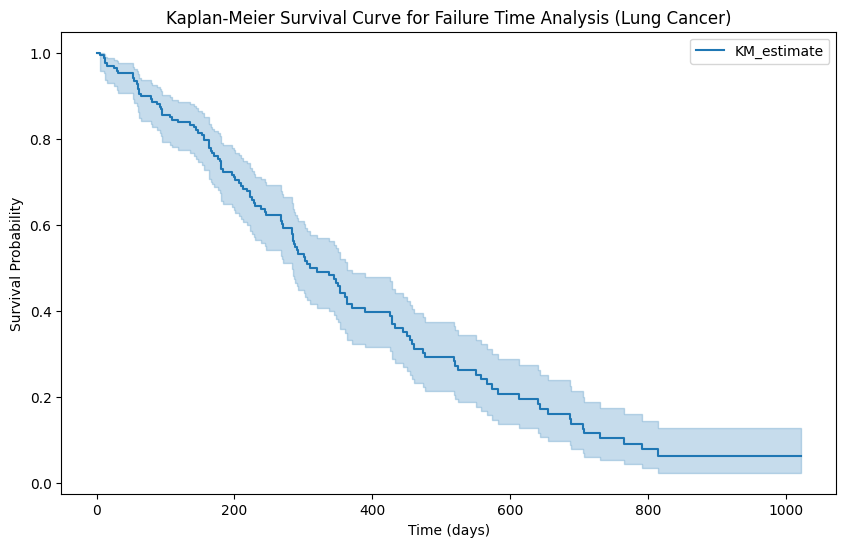

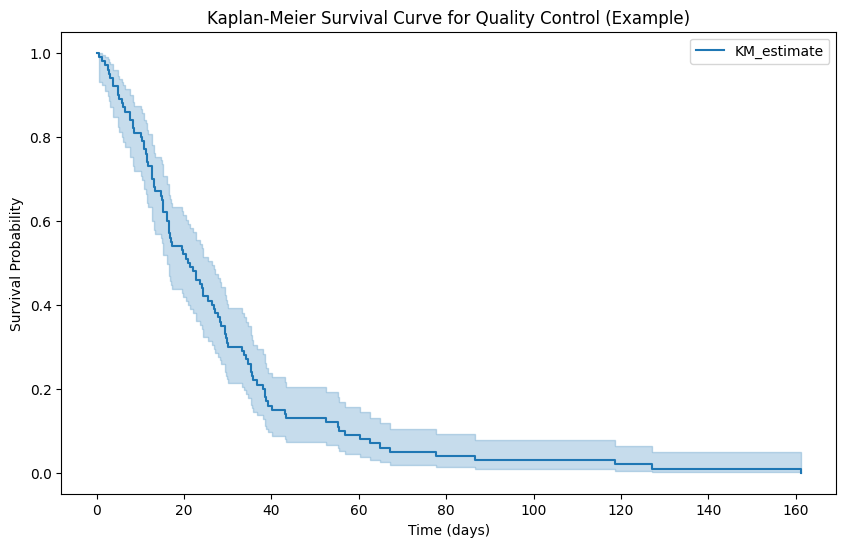

In [17]:
# Load the lung cancer dataset
data = load_lung()

# Drop missing values
data.dropna(inplace=True)

# Define time-to-event data (failure time analysis)
time = data['time']
status = data['status']

# Plot Kaplan-Meier survival curve for failure time analysis
kmf_failure = KaplanMeierFitter()
kmf_failure.fit(time, event_observed=status)

plt.figure(figsize=(10, 6))
kmf_failure.plot()
plt.title('Kaplan-Meier Survival Curve for Failure Time Analysis (Lung Cancer)')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()

# Quality control analysis (example demonstration)
# Here, we can simulate a dataset representing product lifetimes or time-to-failure data
# and apply survival analysis techniques to assess product reliability

# Simulate product lifetimes (example)
np.random.seed(123)
product_lifetimes = np.random.exponential(scale=30, size=100)  # Example exponential distribution with mean lifetime of 30 days

# Fit Kaplan-Meier survival curve for quality control analysis
kmf_quality_control = KaplanMeierFitter()
kmf_quality_control.fit(product_lifetimes)

plt.figure(figsize=(10, 6))
kmf_quality_control.plot()
plt.title('Kaplan-Meier Survival Curve for Quality Control (Example)')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()
